In [1]:
import numpy as np
import matplotlib.pyplot as plt
import itertools
from qecsim.graphtools import blossom5


In [4]:
# Python program for Dijkstra's single
# source shortest path algorithm. The program is
# for adjacency matrix representation of the graph
class Graph():
 
    def __init__(self, vertices):
        self.V = vertices
        self.graph = [[0 for column in range(vertices)]
                      for row in range(vertices)]
 
    def printSolution(self, dist):
        print("Vertex \t Distance from Source")
        for node in range(self.V):
            print(node, "\t\t", dist[node])
 
    # A utility function to find the vertex with
    # minimum distance value, from the set of vertices
    # not yet included in shortest path tree
    def minDistance(self, dist, sptSet):
 
        # Initialize minimum distance for next node
        min = 1e7
 
        # Search not nearest vertex not in the
        # shortest path tree
        for v in range(self.V):
            if dist[v] < min and sptSet[v] == False:
                min = dist[v]
                min_index = v
 
        return min_index
 
    # Function that implements Dijkstra's single source
    # shortest path algorithm for a graph represented
    # using adjacency matrix representation
    def dijkstra(self, src):
 
        dist = [1e7] * self.V
        dist[src] = 0
        sptSet = [False] * self.V
 
        for cout in range(self.V):
 
            # Pick the minimum distance vertex from
            # the set of vertices not yet processed.
            # u is always equal to src in first iteration
            u = self.minDistance(dist, sptSet)
 
            # Put the minimum distance vertex in the
            # shortest path tree
            sptSet[u] = True
 
            # Update dist value of the adjacent vertices
            # of the picked vertex only if the current
            # distance is greater than new distance and
            # the vertex in not in the shortest path tree
            for v in range(self.V):
                if (self.graph[u][v] > 0 and
                   sptSet[v] == False and
                   dist[v] > dist[u] + self.graph[u][v]):
                    dist[v] = dist[u] + self.graph[u][v]
 
        self.printSolution(dist)
 
# Driver program
g = Graph(9)
g.graph = [[0, 4, 0, 0, 0, 0, 0, 8, 0],
           [4, 0, 8, 0, 0, 0, 0, 11, 0],
           [0, 8, 0, 7, 0, 4, 0, 0, 2],
           [0, 0, 7, 0, 9, 14, 0, 0, 0],
           [0, 0, 0, 9, 0, 10, 0, 0, 0],
           [0, 0, 4, 14, 10, 0, 2, 0, 0],
           [0, 0, 0, 0, 0, 2, 0, 1, 6],
           [8, 11, 0, 0, 0, 0, 1, 0, 7],
           [0, 0, 2, 0, 0, 0, 6, 7, 0]
           ]
 
g.dijkstra(0)
 

Vertex 	 Distance from Source
0 		 0
1 		 4
2 		 12
3 		 19
4 		 21
5 		 11
6 		 9
7 		 8
8 		 14


## Error threshold calculation (star stabilizers)


In [ ]:
## star stabilizer
def x_recovery(x1,y1,x2,y2):
    if y2<y1:
        x1, x2 = x2, x1
        y1, y2 = y2, y1

    dx = np.abs(x1-x2)
    dy = np.abs(y1-y2)
    dl = min(dx,c-dx)+min(dy,r-dy)
    if dy > r-dy:
        if dx > c-dx:
            if x1<x2:
                v1x = np.arange(x1,x2-c-1,-1) %c 
                v1y = [y1]*len(v1x)
                p1x = np.arange(x1-1,x2-c-1,-1)%c + 0.5
                p1y = [y1]*len(p1x)
                v2y = np.arange(y1-1,y2-r-1,-1) %r
                p2y = np.arange(y1-1,y2-r-1,-1)%r + 0.5
            else:
                v1x = np.arange(x2,x1-c-1,-1) %c 
                v1y = [y2]*len(v1x)
                p1x = np.arange(x2-1,x1-c-1,-1)%c + 0.5
                p1y = [y2]*len(p1x)                
                v2y = np.arange(y2+1,y1+r+1) %r
                p2y = np.arange(y2,y1+r)%r + 0.5
            v2x = [max(x1,x2)]*len(v2y)
            p2x = [max(x1,x2)]*len(p2y)
        else:
            if x1<x2:
                v1x = np.arange(x1,x2+1)
                v1y = [y1]*len(v1x)
                p1x = np.arange(x1,x2) + 0.5
                p1y = [y1]*len(p1x)
                v2y = np.arange(y1-1,y2-r-1,-1) %r
                p2y = np.arange(y1-1,y2-r-1,-1) %r + 0.5
            elif x1==x2:
                v2y = np.arange(y1,y2-r-1,-1) %r
                p2y = np.arange(y1-1,y2-r-1,-1) %r + 0.5
            else:
                v1x = np.arange(x2,x1+1)
                v1y = [y2]*len(v1x)
                p1x = np.arange(x2,x1) + 0.5
                p1y = [y2]*len(p1x)
                v2y = np.arange(y2+1,y1+r+1) %r
                p2y = np.arange(y2,y1+r) %r + 0.5
            v2x = [max(x1,x2)]*len(v2y)
            p2x = [max(x1,x2)]*len(p2y)
            
        if dx == 0:
            vx = np.array(v2x)
            vy = np.array(v2y)
            px = np.array(p2x)
            py = np.array(p2y) 
        else:
            vx = np.concatenate((v1x,v2x))
            vy = np.concatenate((v1y,v2y))
            px = np.concatenate((p1x,p2x))
            py = np.concatenate((p1y,p2y))
            
    else:
        if dx > c-dx:
            if dy>0:
                if x1<x2:
                    v1x = np.arange(x1,x2-c-1,-1)%c
                    v1y = [y1]*len(v1x)
                    p1x = np.arange(x1-1,x2-c-1,-1)%c + 0.5
                    p1y = [y1]*len(p1x)
                    v2y = np.arange(y1+1,y2+1)
                    p2y = np.arange(y1,y2) + 0.5
                else:
                    v1x = np.arange(x2,x1-c-1,-1)%c
                    v1y = [y2]*len(v1x)
                    p1x = np.arange(x2-1,x1-c-1,-1)%c + 0.5
                    p1y = [y2]*len(p1x)
                    v2y = np.arange(y2-1,y1-1,-1)
                    p2y = np.arange(y2,y1,-1) - 0.5
                v2x = [max(x1,x2)]*len(v2y)
                p2x = [max(x1,x2)]*len(p2y)
                
                vx = np.concatenate((v1x,v2x))
                vy = np.concatenate((v1y,v2y))
                px = np.concatenate((p1x,p2x))
                py = np.concatenate((p1y,p2y))
            else:
                vx = np.arange(min(x1,x2),max(x1,x2)-c-1,-1)%c
                vy = np.array([y1]*len(vx))
                px = np.arange(min(x1,x2)-1,max(x1,x2)-c-1,-1)%c + 0.5
                py = np.array([y1]*len(px))
                
        else:
            if x1<x2:
                v1x = np.arange(x1,x2+1)
                v1y = [y1]*len(v1x)
                v2y = np.arange(y1+1,y2+1)
                v2x = [max(x1,x2)]*len(v2y)
            elif x1==x2:
                v2y = np.arange(y1,y2+1)
                v2x = [max(x1,x2)]*len(v2y)
            else:
                v1x = np.arange(x2,x1+1)
                v1y = [y2]*len(v1x)
                v2y = np.arange(y2-1,y1-1,-1)
                v2x = [max(x1,x2)]*len(v2y)
                
            if dy ==0:
                vx = np.array(v1x)
                vy = np.array(v1y)
            elif dx == 0:
                vx = np.array(v2x)
                vy = np.array(v2y)
            else:
                vx = np.concatenate((v1x,v2x))
                vy = np.concatenate((v1y,v2y))

            px = (vx[0:len(vx)-1]+vx[1:])/2 
            py = (vy[0:len(vy)-1]+vy[1:])/2 

    return vx, vy, px, py

In [2]:
Nrep = 1000 # number of iterations
L_list = [3,5,7,9]
pz_list = np.linspace(0.001,0.3,20)
fail_prob_z = np.zeros((len(L_list),len(pz_list)))

for i_L, r in enumerate(L_list):
    print("L= ", r)
    l = 2 # number of sublattice points (2 for toric code) or primal/dual
#     r = 5 # number of columns
    c = r # number of rows

    Λ = np.kron([[0,1],[1,0]],np.eye(l*r*c))
    # star stabilzers
    Sx = np.zeros((r*c,l*r*c))
    for row in range(r):
        for col in range(c):
            Sx[row*c + col, 2*(row*c+col)] = 1
            Sx[row*c + col, 2*(row*c+col)+1] = 1
            Sx[row*c + col, 2*(row*c+(col-1)%c )] = 1
            Sx[row*c + col, 2*(((row-1)%r)*c+col)+1] = 1
    Sx = np.concatenate((Sx,np.zeros((r*c,l*r*c))),axis=1)

    logicals = np.zeros((4,2*l*r*c))
    ## x ops
    logicals[0,1:2*c+1:2] = np.ones(c) 
    logicals[1,0:l*r*c:2*c] = np.ones(c) 
    ## z ops
    logicals[2,l*r*c:(l*r*c+2*c):2] = np.ones(c) 
    logicals[3,l*r*c+1:2*l*r*c:2*c] = np.ones(c)


    for i_p, prob_z in enumerate(pz_list):
        # z flip error
        for i_n in range(Nrep):
            zflip = np.random.rand(l,r,c) 
            zflip_inds = np.argwhere(zflip < prob_z)
            error_z = np.zeros(l*r*c)
            for i in range(len(zflip_inds)):
                error_z[zflip_inds[i][0]+2*(zflip_inds[i][1]*c+zflip_inds[i][2])] = 1
            error_tot = np.reshape(np.concatenate((np.zeros(l*r*c),error_z)),[1,2*l*r*c])

            # find syndrome
            syndrome_x = np.dot(error_tot,np.dot(Λ,Sx.T)) % 2
            synd_x_inds = np.argwhere(syndrome_x > 0)

            x_graph = []
            x_graph_inds = []
            x_graph_paths = {}
            for i1 in range(len(synd_x_inds[:,1])):
                for i2 in range(i1+1,len(synd_x_inds[:,1])):
                    ind1 = synd_x_inds[i1,1]
                    ind2 = synd_x_inds[i2,1]        
                    x_graph_inds.append([ind1,ind2])
                    y1 = int(ind1/c)
                    y2 = int(ind2/c)
                    dy = np.abs(y1-y2)
                    x1 = ind1%c
                    x2 = ind2%c
                    dx = np.abs(x1-x2)               

                    dy = min(dy,r-dy)
                    dx = min(dx,c-dx)
                    x_graph.append((i1,i2,dx+dy ))

            rec_x = np.zeros(l*r*c)
            mates = blossom5.mwpm_ids(x_graph)
            for links in mates:
                l_graph = synd_x_inds[np.array(links),1]

                x1 = (l_graph[0]%c) 
                y1 = int(l_graph[0]/c)
                x2 = (l_graph[1]%c) 
                y2 = int(l_graph[1]/c) 
                dx = np.abs(x1-x2)
                dy = np.abs(y1-y2)
                vx, vy, px, py = x_recovery(x1,y1,x2,y2)

                for j in range(len(px)):
                    if px[j]-int(px[j])>0:
                        rec_x[2*(int(py[j])*c+int(px[j]))]  += 1
                    else:
                        rec_x[1+2*(int(py[j])*c+int(px[j]))]  += 1

            rec_tot = np.reshape(np.concatenate((np.zeros(l*r*c),rec_x)),[1,2*l*r*c])
            assert np.sum(np.dot( (rec_tot + error_tot )%2 , np.dot(Λ, Sx.T)) % 2) == 0

            ###########
            if np.sum(np.dot( (rec_tot + error_tot )%2 , np.dot(Λ, logicals[0:2,:].T))%2)  > 0:
                fail_prob_z[i_L,i_p] +=  1

print("Done!")

L=  3
L=  5
L=  7


KeyboardInterrupt: 

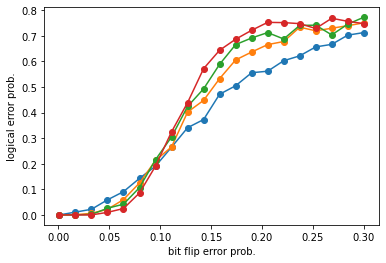

In [117]:
plt.plot(pz_list,fail_prob_z.T/Nrep,"o-")
# plt.plot(px_list,fail_prob_x.T/Nrep,"x-")
plt.xlabel("bit flip error prob.")
plt.ylabel("logical error prob.")
plt.show()

## check logical errors (graphically)

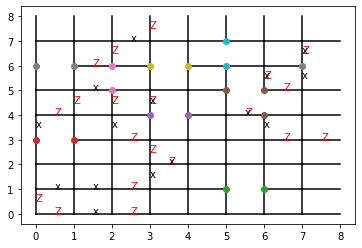

[1. 1. 1. 1. 0. 1. 1. 1.]
[1. 0. 0. 0. 0. 0. 0. 1.]


In [464]:
## star stabilizer
def plot_qubit_error(vec,text):
    for i in range(len(vec)):
        if vec[i][0] == 0 :
            ry = vec[i][1] 
            rx = vec[i][2] + 0.5   
        else:
            ry = vec[i][1] + 0.5
            rx = vec[i][2]    
        plt.text(rx,ry,text,color="g")
        
l = 2
r1 = 8
r2 = r1

# star stabilzers
Sx = np.zeros((r1*r2,l*r1*r2),dtype=int)
for i_y in range(r2):
    for i_x in range(r1):
        Sx[i_y*r1 + i_x, 2*(i_y*r1 + i_x)] = 1
        Sx[i_y*r1 + i_x, 2*(i_y*r1 + i_x)+1] = 1
        Sx[i_y*r1 + i_x, 2*(i_y*r1+(i_x-1)%r1 )] = 1
        Sx[i_y*r1 + i_x, 2*(((i_y-1)%r1)*r1+i_x)+1] = 1

m = Matching(Sx)

logicals = np.zeros((2,l*r1*r2))
## x ops
logicals[0,1:2*r1+1:2] = np.ones(r2) 
logicals[1,0:l*r1*r2:2*r2] = np.ones(r2) 

# ##### does not work
# percol_check = np.zeros((r1+r2,l*r1*r2))
# for i_r in range(r):
#     percol_check[i_r,(2*i_r*c+1):2*(i_r+1)*c+1:2] = np.ones(c) 
# for i_c in range(c):
#     percol_check[i_c+r,(0+2*i_c):((2*i_c+l*(r-1)*c)+1):2*c] = np.ones(r) 
# # print(np.argwhere(percol_check>0))

# loss error
prob_l = 0.08 # loss error probability
error_loss = np.random.rand(l*r1*r2) 
loss_inds = np.argwhere(error_loss < prob_l)[:,0]
remain_inds = np.argwhere(error_loss >= prob_l)[:,0]
error_loss[loss_inds] = 1
error_loss[remain_inds] = 0

# print(loss_inds)

# plt.figure(1)
# for i in range(len(loss_inds)):
#     latt_pos = int(loss_inds[i]/2)
#     if loss_inds[i] % 2 == 0 :
#         ry = int(latt_pos/r1) 
#         rx = (latt_pos%r1) + 0.5   
#     else:
#         ry = int(latt_pos/r1)  + 0.5 #+0.1
#         rx = (latt_pos%r1)   

#     plt.text(rx,ry,"L",color="b")
plt.figure(1)
for i in range(len(remain_inds)):
    latt_pos = int(remain_inds[i]/2)
    if remain_inds[i] % 2 == 0 :
        ry = int(latt_pos/r1) 
        rx = (latt_pos%r1) 
        plt.plot([rx,rx+1],[ry,ry],color="k")
    else:
        ry = int(latt_pos/r1)  
        rx = (latt_pos%r1)   
        plt.plot([rx,rx],[ry,ry+1],color="k")

Sx_new = []
inds_new = []
Sx_old = np.copy(Sx)
inds_old = list(range(r1*r2))
for loss_index in loss_inds:
    st_ind = np.argwhere(Sx_old[:,loss_index]>0)
    st_ind = list(st_ind[:,0])
    if len(st_ind)==2:
        inds_new.append(st_ind)
        Stot = np.zeros(l*r1*r2)
        for i_remove in st_ind:
            inds_old.remove(i_remove)
            Stot += Sx_old[i_remove,:]
        Sx_new.append(list(Stot%2)) 
        Sx_old[st_ind,:] = 0
    elif len(st_ind)==1:
        # print(inds_new)
        # print(Sx_new)
        st_new_ind = np.argwhere(np.array(Sx_new)[:,loss_index]>0)[0,0]
        # print(st_new_ind)
        inds_new[st_new_ind][:] += st_ind
        inds_old.remove(st_ind[0])
        Sx_new[st_new_ind] = list((np.array(Sx_new)[st_new_ind,:]+Sx_old[st_ind[0],:]) %2)
        Sx_old[st_ind,:] = 0
    else:
        # print(loss_index)
        st_new_ind = np.argwhere(np.array(Sx_new)[:,loss_index]>0)
        if len(st_new_ind)>1:
            st_new_ind = list(st_new_ind[:,0])
            # print(st_new_ind)
            # print("current inds: ", inds_new)
            inds_new[st_new_ind[0]][:] += inds_new[st_new_ind[1]][:]
            Stot = np.zeros(l*r1*r2)
            for i_remove in st_new_ind:
                Stot += np.array(Sx_new)[i_remove,:]        
            Sx_new[st_new_ind[0]] = list(Stot%2)
            del inds_new[st_new_ind[1]]
            del Sx_new[st_new_ind[1]]
Sx_new = np.array(Sx_new, dtype=int)
# print(inds_old)
# print(remain_inds)
# print(Sx_old)
# print(inds_new)
# print(Sx_new)

for loss_index in loss_inds:
    st_ind = np.argwhere(Sx_old[:,loss_index]>0)
    st_new_ind = np.argwhere(Sx_old[:,loss_index]>0)
    assert len(st_ind)+len(st_new_ind)==0

color = 1
for s_plaq in inds_new:
    color += 1
    for latt_pos in s_plaq:
        plt.plot((latt_pos%r1),int(latt_pos/r1),"o",color="C%d" % (color))

# ##### does not work
# if np.prod(np.dot(error_loss,percol_check[0:r].T)%2) > 0:
#     print("failure y")
# if np.prod(np.dot(error_loss,percol_check[r:-1].T)%2) > 0:
#     print("failure x")

# Sx_broken = np.zeros(r1*r2)
# for i in range(len(loss_inds)):
#     latt_pos = int(loss_inds[i]/2)
#     xy = loss_inds[i]%2
#     Sx_broken[latt_pos] += 1
#     if xy == 0 :
#         latt_pos_2 = (((latt_pos%r1)+1)%r1)+ r1*int(latt_pos/r1)
#         Sx_broken[latt_pos_2] += 1
#     else:
#         latt_pos_2 = (latt_pos%r1)+ r1*((int(latt_pos/r1)+1)%r2)
#         Sx_broken[latt_pos_2] += 1    

# # print(Sx_broken)
# for i in range(len(Sx_broken)):
#     if Sx_broken[i]>0:
#         plt.text((i%r1)-0.05,int(i/r1)+0.05,"%d" % (Sx_broken[i]))



# assert (np.sum(np.dot( rec_x ,  Sx.T) % 2)% 2) == 0
# # assert np.sum(np.dot( rec_tot , np.dot(Λ, Sx.T)) % 2) %2 >0
# np.dot( (rec_x + error_z )%2 , logicals.T) % 2

num_Sx_red = len(inds_new)+len(inds_old)
Sx_red = np.zeros((num_Sx_red,len(remain_inds)),dtype=int)
# print(np.shape(Sx_red[0:len(inds_old),:]),np.shape(Sx_old[np.ix_(inds_old,remain_inds)]))
Sx_red[0:len(inds_old),:] = Sx_old[np.ix_(inds_old,remain_inds)]
if len(inds_new)>0:
    Sx_red[len(inds_old):,:] = Sx_new[:,remain_inds]

keep_cols = np.argwhere(np.sum(Sx_red,axis=0)>0)[:,0]
Sx_red = Sx_red[:,keep_cols]

# print(np.shape(Sx_red))
# print(Sx_red.T@Sx_red)

overlap = Sx_red.T@Sx_red
inds_to_keep = list(range(np.size(Sx_red,1)))
nl = []
counter = 0
i = 0 
while counter < np.size(Sx_red,1):
    edge = inds_to_keep[i]
    ovlp_inds = np.argwhere(overlap[edge,inds_to_keep[i+1:]]==2)
    if len(ovlp_inds)>0:
        # print("edge= ", edge)
        for j in ovlp_inds[::-1,0]:
            # print(inds_to_keep[i+1+j])
            inds_to_keep.remove(inds_to_keep[i+1+j])
        # print(inds_to_keep)
        counter += (len(ovlp_inds)+1)
        nl.append(len(ovlp_inds)+1)
    else:
        counter += 1
        nl.append(1)
    i += 1

# print(inds_to_keep)  
# print(nl)
Sx_red_netx = Sx_red[:,inds_to_keep]
remain_qubits = remain_inds[keep_cols[inds_to_keep]]
# print(remain_qubits)
num_edge = len(remain_qubits) #np.size(Sx_red_netx,1)
# print(num_edge)

nl = np.array(nl)
# print(nl)
pl = (1-(1-2*prob_z)**nl)/2


# print(np.shape(Sx_red_netx))
# print(Sx_red_netx.T@Sx_red_netx)

# # print(Sx_red)
# print(np.sum(Sx_red,axis=0))
if num_edge > 1:
    # print("logical qubits: ", num_edge-2*Sx_red_netx.shape[0]+2)
    m = Matching(Sx_red_netx,spacelike_weights=np.log((1-pl)/pl))

prob_z = 0.2 # error probability
error_z = np.random.rand(num_edge) 
zflip_inds = np.argwhere(error_z < prob_z)[:,0]
no_zflip_inds = np.argwhere(error_z >= prob_z)[:,0]
error_z[zflip_inds] = 1
error_z[no_zflip_inds] = 0

plt.figure(1)
for i in range(len(zflip_inds)):
    latt_pos = int(remain_qubits[zflip_inds[i]]/2)
    if remain_qubits[zflip_inds[i]] % 2 == 0 :
        ry = int(latt_pos/r1) 
        rx = (latt_pos%r1) + 0.5   
    else:
        ry = int(latt_pos/r1)  + 0.5 #+0.1
        rx = (latt_pos%r1)   

    plt.text(rx,ry,"Z",color="r")
    
# find syndrome
syndrome_x = Sx_red_netx@error_z % 2
synd_x_inds = np.argwhere(syndrome_x > 0)
# print(synd_x_inds)
if len(synd_x_inds)>0:
    rec2 = m.decode(syndrome_x)
    rec2_inds = np.argwhere(rec2 > 0)[:,0]
    # print(rec2_inds[:,0])
    plt.figure(1)
    for i in range(len(rec2_inds)):
        latt_pos = int(remain_qubits[rec2_inds[i]]/2)
        if remain_qubits[rec2_inds[i]] % 2 == 0 :
            ry = int(latt_pos/r1) 
            rx = (latt_pos%r1) + 0.5   
        else:
            ry = int(latt_pos/r1)  + 0.5 #+0.1
            rx = (latt_pos%r1)   

        plt.text(rx,ry,"x",color="k")
    
# ###########

plt.xticks(np.arange(0,r1+1.))
plt.yticks(np.arange(0,r2+1.))
# plt.grid()
plt.show()

# logicals_red = np.zeros((2,num_edge),dtype=int)
# l1 = np.arange(1,2*r1+1,2)
# l2 = np.arange(0,l*r1*r2,2*r2)
# for i1 in l1:
#     ind1 = np.argwhere(remain_qubits==i1)
#     if len(ind1)>0:
#         logicals_red[0,ind1[0]]=1
# for i2 in l2:
#     ind2 = np.argwhere(remain_qubits==i2)
#     if len(ind2)>0:
#         logicals_red[1,ind2[0]]=1
logicals_v = np.zeros((r1,num_edge),dtype=int)
for i1 in range(r1):
    i_h = np.argwhere(remain_qubits%2 == 0 )[:,0]
    # print(remain_qubits[i_h])
    inds = np.argwhere(np.floor(remain_qubits[i_h]/2)%r1 == i1)
    logicals_v[i1,i_h[inds]]= 1

logicals_h = np.zeros((r2,num_edge),dtype=int)
for i2 in range(r2):
    i_v = np.argwhere(remain_qubits%2 == 1 )[:,0]
    inds = np.argwhere(np.floor(np.floor(remain_qubits[i_v]/2)/r1) == i2)
    logicals_h[i2,i_v[inds]]= 1


print(np.dot( (rec2 + error_z )%2 , logicals_h.T) %2 ) 
print(np.dot( (rec2 + error_z )%2 , logicals_v.T) %2 ) 



In [242]:
a = np.arange(12).reshape(3, 4)
print(a)
# [[ 0  1  2  3]
#  [ 4  5  6  7]
#  [ 8  9 10 11]]

a_del = np.delete(a, 1, 0)
print(a_del)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
[[ 0  1  2  3]
 [ 8  9 10 11]]


In [151]:
## star stabilizer
def plot_qubit_error(vec,text):
    for i in range(len(vec)):
        if vec[i][0] == 0 :
            ry = vec[i][1] 
            rx = vec[i][2] + 0.5   
        else:
            ry = vec[i][1] + 0.5
            rx = vec[i][2]    
        plt.text(rx,ry,text,color="g")
        
l = 2
r1 = 8
r2 = r1

# star stabilzers
Sx = np.zeros((r1*r2,l*r1*r2),dtype=int)
for i_y in range(r2):
    for i_x in range(r1):
        Sx[i_y*r1 + i_x, 2*(i_y*r1 + i_x)] = 1
        Sx[i_y*r1 + i_x, 2*(i_y*r1 + i_x)+1] = 1
        Sx[i_y*r1 + i_x, 2*(i_y*r1+(i_x-1)%r1 )] = 1
        Sx[i_y*r1 + i_x, 2*(((i_y-1)%r1)*r1+i_x)+1] = 1

m = Matching(Sx)

logicals = np.zeros((2,l*r1*r2))
## x ops
logicals[0,1:2*r1+1:2] = np.ones(r2) 
logicals[1,0:l*r1*r2:2*r2] = np.ones(r2) 

# ##### does not work
# percol_check = np.zeros((r1+r2,l*r1*r2))
# for i_r in range(r):
#     percol_check[i_r,(2*i_r*c+1):2*(i_r+1)*c+1:2] = np.ones(c) 
# for i_c in range(c):
#     percol_check[i_c+r,(0+2*i_c):((2*i_c+l*(r-1)*c)+1):2*c] = np.ones(r) 
# # print(np.argwhere(percol_check>0))

# loss error
prob_l = 0.08 # loss error probability
error_loss = np.random.rand(l*r1*r2) 
loss_inds = np.argwhere(error_loss < prob_l)[:,0]
remain_inds = np.argwhere(error_loss >= prob_l)[:,0]
error_loss[loss_inds] = 1
error_loss[remain_inds] = 0

# print(loss_inds)

# plt.figure(1)
# for i in range(len(loss_inds)):
#     latt_pos = int(loss_inds[i]/2)
#     if loss_inds[i] % 2 == 0 :
#         ry = int(latt_pos/r1) 
#         rx = (latt_pos%r1) + 0.5   
#     else:
#         ry = int(latt_pos/r1)  + 0.5 #+0.1
#         rx = (latt_pos%r1)   

#     plt.text(rx,ry,"L",color="b")
plt.figure(1)
for i in range(len(remain_inds)):
    latt_pos = int(remain_inds[i]/2)
    if remain_inds[i] % 2 == 0 :
        ry = int(latt_pos/r1) 
        rx = (latt_pos%r1) 
        plt.plot([rx,rx+1],[ry,ry],color="k")
    else:
        ry = int(latt_pos/r1)  
        rx = (latt_pos%r1)   
        plt.plot([rx,rx],[ry,ry+1],color="k")

Sx_new = []
inds_new = []
Sx_old = np.copy(Sx)
inds_old = list(range(r1*r2))
for loss_index in loss_inds:
    st_ind = np.argwhere(Sx_old[:,loss_index]>0)
    st_ind = list(st_ind[:,0])
    if len(st_ind)==2:
        inds_new.append(st_ind)
        Stot = np.zeros(l*r1*r2)
        for i_remove in st_ind:
            inds_old.remove(i_remove)
            Stot += Sx_old[i_remove,:]
        Sx_new.append(list(Stot%2)) 
        Sx_old[st_ind,:] = 0
    elif len(st_ind)==1:
        # print(inds_new)
        # print(Sx_new)
        st_new_ind = np.argwhere(np.array(Sx_new)[:,loss_index]>0)[0,0]
        # print(st_new_ind)
        inds_new[st_new_ind][:] += st_ind
        inds_old.remove(st_ind[0])
        Sx_new[st_new_ind] = list((np.array(Sx_new)[st_new_ind,:]+Sx_old[st_ind[0],:]) %2)
        Sx_old[st_ind,:] = 0
    else:
        # print(loss_index)
        st_new_ind = np.argwhere(np.array(Sx_new)[:,loss_index]>0)
        if len(st_new_ind)>1:
            st_new_ind = list(st_new_ind[:,0])
            # print(st_new_ind)
            # print("current inds: ", inds_new)
            inds_new[st_new_ind[0]][:] += inds_new[st_new_ind[1]][:]
            Stot = np.zeros(l*r1*r2)
            for i_remove in st_new_ind:
                Stot += np.array(Sx_new)[i_remove,:]        
            Sx_new[st_new_ind[0]] = list(Stot%2)
            del inds_new[st_new_ind[1]]
            del Sx_new[st_new_ind[1]]
Sx_new = np.array(Sx_new, dtype=int)
# print(inds_old)
# print(remain_inds)
# print(Sx_old)
# print(inds_new)
# print(Sx_new)

for loss_index in loss_inds:
    st_ind = np.argwhere(Sx_old[:,loss_index]>0)
    st_new_ind = np.argwhere(Sx_old[:,loss_index]>0)
    assert len(st_ind)+len(st_new_ind)==0

color = 1
for s_plaq in inds_new:
    color += 1
    for latt_pos in s_plaq:
        plt.plot((latt_pos%r1),int(latt_pos/r1),"o",color="C%d" % (color))

# ##### does not work
# if np.prod(np.dot(error_loss,percol_check[0:r].T)%2) > 0:
#     print("failure y")
# if np.prod(np.dot(error_loss,percol_check[r:-1].T)%2) > 0:
#     print("failure x")

# Sx_broken = np.zeros(r1*r2)
# for i in range(len(loss_inds)):
#     latt_pos = int(loss_inds[i]/2)
#     xy = loss_inds[i]%2
#     Sx_broken[latt_pos] += 1
#     if xy == 0 :
#         latt_pos_2 = (((latt_pos%r1)+1)%r1)+ r1*int(latt_pos/r1)
#         Sx_broken[latt_pos_2] += 1
#     else:
#         latt_pos_2 = (latt_pos%r1)+ r1*((int(latt_pos/r1)+1)%r2)
#         Sx_broken[latt_pos_2] += 1    

# # print(Sx_broken)
# for i in range(len(Sx_broken)):
#     if Sx_broken[i]>0:
#         plt.text((i%r1)-0.05,int(i/r1)+0.05,"%d" % (Sx_broken[i]))



# assert (np.sum(np.dot( rec_x ,  Sx.T) % 2)% 2) == 0
# # assert np.sum(np.dot( rec_tot , np.dot(Λ, Sx.T)) % 2) %2 >0
# np.dot( (rec_x + error_z )%2 , logicals.T) % 2

num_Sx_red = len(inds_new)+len(inds_old)
Sx_red = np.zeros((num_Sx_red,len(remain_inds)),dtype=int)
# print(np.shape(Sx_red[0:len(inds_old),:]),np.shape(Sx_old[np.ix_(inds_old,remain_inds)]))
Sx_red[0:len(inds_old),:] = Sx_old[np.ix_(inds_old,remain_inds)]
if len(inds_new)>0:
    Sx_red[len(inds_old):,:] = Sx_new[:,remain_inds]

keep_cols = np.argwhere(np.sum(Sx_red,axis=0)>0)[:,0]
Sx_red = Sx_red[:,keep_cols]

# print(np.shape(Sx_red))
# print(Sx_red.T@Sx_red)

overlap = Sx_red.T@Sx_red
inds_to_keep = list(range(np.size(Sx_red,1)))
nl = []
counter = 0
i = 0 
while counter < np.size(Sx_red,1):
    edge = inds_to_keep[i]
    ovlp_inds = np.argwhere(overlap[edge,inds_to_keep[i+1:]]==2)
    if len(ovlp_inds)>0:
        # print("edge= ", edge)
        for j in ovlp_inds[::-1,0]:
            # print(inds_to_keep[i+1+j])
            inds_to_keep.remove(inds_to_keep[i+1+j])
        # print(inds_to_keep)
        counter += (len(ovlp_inds)+1)
        nl.append(len(ovlp_inds)+1)
    else:
        counter += 1
        nl.append(1)
    i += 1

# print(inds_to_keep)  
# print(nl)
Sx_red_netx = Sx_red[:,inds_to_keep]
remain_qubits = remain_inds[keep_cols[inds_to_keep]]
# print(remain_qubits)
num_edge = len(remain_qubits) #np.size(Sx_red_netx,1)
# print(num_edge)

nl = np.array(nl)
# print(nl)
pl = (1-(1-2*prob_z)**nl)/2


# print(np.shape(Sx_red_netx))
# print(Sx_red_netx.T@Sx_red_netx)

# # print(Sx_red)
# print(np.sum(Sx_red,axis=0))
if num_edge > 1:
    # print("logical qubits: ", num_edge-2*Sx_red_netx.shape[0]+2)
    m = Matching(Sx_red_netx,spacelike_weights=np.log((1-pl)/pl))

prob_z = 0.2 # error probability
error_z = np.random.rand(num_edge) 
zflip_inds = np.argwhere(error_z < prob_z)[:,0]
no_zflip_inds = np.argwhere(error_z >= prob_z)[:,0]
error_z[zflip_inds] = 1
error_z[no_zflip_inds] = 0

plt.figure(1)
for i in range(len(zflip_inds)):
    latt_pos = int(remain_qubits[zflip_inds[i]]/2)
    if remain_qubits[zflip_inds[i]] % 2 == 0 :
        ry = int(latt_pos/r1) 
        rx = (latt_pos%r1) + 0.5   
    else:
        ry = int(latt_pos/r1)  + 0.5 #+0.1
        rx = (latt_pos%r1)   

    plt.text(rx,ry,"Z",color="r")
    
# find syndrome
syndrome_x = Sx_red_netx@error_z % 2
synd_x_inds = np.argwhere(syndrome_x > 0)
# print(synd_x_inds)
if len(synd_x_inds)>0:
    rec2 = m.decode(syndrome_x)
    rec2_inds = np.argwhere(rec2 > 0)[:,0]
    # print(rec2_inds[:,0])
    plt.figure(1)
    for i in range(len(rec2_inds)):
        latt_pos = int(remain_qubits[rec2_inds[i]]/2)
        if remain_qubits[rec2_inds[i]] % 2 == 0 :
            ry = int(latt_pos/r1) 
            rx = (latt_pos%r1) + 0.5   
        else:
            ry = int(latt_pos/r1)  + 0.5 #+0.1
            rx = (latt_pos%r1)   

        plt.text(rx,ry,"x",color="k")
    
# ###########

plt.xticks(np.arange(0,r1+1.))
plt.yticks(np.arange(0,r2+1.))
# plt.grid()
plt.show()

# logicals_red = np.zeros((2,num_edge),dtype=int)
# l1 = np.arange(1,2*r1+1,2)
# l2 = np.arange(0,l*r1*r2,2*r2)
# for i1 in l1:
#     ind1 = np.argwhere(remain_qubits==i1)
#     if len(ind1)>0:
#         logicals_red[0,ind1[0]]=1
# for i2 in l2:
#     ind2 = np.argwhere(remain_qubits==i2)
#     if len(ind2)>0:
#         logicals_red[1,ind2[0]]=1
logicals_v = np.zeros((r1,num_edge),dtype=int)
for i1 in range(r1):
    i_h = np.argwhere(remain_qubits%2 == 0 )[:,0]
    # print(remain_qubits[i_h])
    inds = np.argwhere(np.floor(remain_qubits[i_h]/2)%r1 == i1)
    logicals_v[i1,i_h[inds]]= 1

logicals_h = np.zeros((r2,num_edge),dtype=int)
for i2 in range(r2):
    i_v = np.argwhere(remain_qubits%2 == 1 )[:,0]
    inds = np.argwhere(np.floor(np.floor(remain_qubits[i_v]/2)/r1) == i2)
    logicals_h[i2,i_v[inds]]= 1


print(np.dot( (rec2 + error_z )%2 , logicals_h.T) %2 ) 
print(np.dot( (rec2 + error_z )%2 , logicals_v.T) %2 ) 




[2, 4]
[[0, 1, 5, 9, 8, 12, 13, 11, 3, 7, 6, 10, 14, 15]]


# check via plotting

In [193]:
from pymatching import Matching

"""
Each column of Hz corresponds to an X error on a qubit, and each
row corresponds to a Z stabiliser.

Hz[i,j]==1 if Z stabiliser i acts non-trivially
on qubit j, and is 0 otherwise.
"""
Hz = np.array([
    [1,1,0,0,0],
    [0,1,1,0,0],
    [0,0,1,1,0],
    [0,0,0,1,1]
])

plist = np.random.rand(5)
m = Matching(Hz,spacelike_weights=np.log((plist)/plist))
m

<pymatching.Matching object with 4 detectors, 1 boundary node, and 5 edges>

In [194]:
noise = np.array([0,0,1,1,0])
z = Hz@noise % 2
c = m.decode(z)
print("c: {}, of type {}".format(c, type(c)))

c: [0 0 1 1 0], of type <class 'numpy.ndarray'>


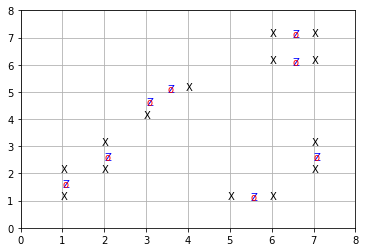

In [93]:
# star stabilzers
l = 2
r1 = 8
r2 = 8
Sx = np.zeros((r1*r2,l*r1*r2),dtype=int)
for i_y in range(r2):
    for i_x in range(r1):
        Sx[i_y*r1 + i_x, 2*(i_y*r1 + i_x)] = 1
        Sx[i_y*r1 + i_x, 2*(i_y*r1 + i_x)+1] = 1
        Sx[i_y*r1 + i_x, 2*(i_y*r1+(i_x-1)%r1 )] = 1
        Sx[i_y*r1 + i_x, 2*(((i_y-1)%r1)*r1+i_x)+1] = 1
m = Matching(Sx)

# z flip error
pz = 0.05 # error probability
zflip = np.random.rand(l,r1,r2) 
zflip_inds = np.argwhere(zflip < pz)
error_z = np.zeros(l*r1*r2)
for i in range(len(zflip_inds)):
    error_z[zflip_inds[i][0]+2*(zflip_inds[i][1]*r1+zflip_inds[i][2])] = 1
plt.figure(1)
for i in range(len(zflip_inds)):
    if zflip_inds[i][0] == 0 :
        ry = zflip_inds[i][1] 
        rx = zflip_inds[i][2] + 0.5   
    else:
        ry = zflip_inds[i][1] + 0.5 #+0.1
        rx = zflip_inds[i][2]    

    plt.text(rx,ry,"Z",color="b")


# find syndrome
syndrome_x = Sx@error_z % 2
synd_x_inds = np.argwhere(syndrome_x > 0)
# print(synd_x_inds)
plt.figure(1)
for i in range(len(synd_x_inds)):
    plt.text((synd_x_inds[i][0]%r1)-0.05,int(synd_x_inds[i][0]/r1)+0.05,'X')
    
rec2 = m.decode(syndrome_x)
rec2_inds = np.argwhere(rec2 > 0)
for i in range(len(rec2_inds)):
    rec2_pos = int(rec2_inds[i]/2)
    if rec2_inds[i] % 2 == 0 :
        ry = int(rec2_pos/r1) 
        rx = (rec2_pos%r1) + 0.5   
    else:
        ry = int(rec2_pos/r1)  + 0.5 #+0.1
        rx = (rec2_pos%r1)
        
    plt.text(rx,ry,"o",color="r")


    
plt.xticks(np.arange(0,r1+1.))
plt.yticks(np.arange(0,r2+1.))
plt.grid()
plt.show()

